# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities[0:10]

['monte alegre',
 'san cristobal',
 'port elizabeth',
 'ostrovnoy',
 'mount gambier',
 'dikson',
 'cape town',
 'punta arenas',
 'butaritari',
 'azul']

In [4]:
rows = []


for city in cities:
    print()
    print(city)
    row = {}

    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        response = requests.get(url)
       
        
        if (response.status_code == 200):
            data = response.json()

            # parse data
            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]
    
                # make second request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
                response2 = requests.get(url2)
                

                if (response2.status_code == 200):
                    data2 = response2.json()
                    
                    # parse data
                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    pressure = data2["main"]["pressure"]
                    wind = data2["wind"]["speed"]
                    clouds = data2["clouds"]["all"]
                    country =data2['sys']["country"]
                   
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan

                # put into flat dictionary
                row["city"] = city
                row["latitude"] = lat
                row["longitude"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["pressure"] = pressure
                row["wind_speed"] = wind
                row["cloudiness"] = clouds
                row["country"] = country
              

                # append to list
                rows.append(row)

            else:
                print(f"no lat/long for {city}")
                pass
        else:
            print(f"failed request for geocode for {city}")
            pass
    except Exception as e:
        print(e)
        print(f"Oh no! Everything failed and broke for {city}. There should be an error above. Sux")
        print()
        
    # sleep
    time.sleep(3)


monte alegre

san cristobal

port elizabeth

ostrovnoy

mount gambier

dikson

cape town

punta arenas

butaritari

azul

belmonte

lagoa

wagga wagga

praia da vitoria

labuhan

sataua

pyu

clarence town

lockport

wajir

santa isabel do rio negro

bredasdorp

ust-kuyga

albany

caravelas

ushuaia

jamestown

sajanan

puerto ayora

arys

iqaluit

madimba

hermanus

cabo san lucas

kawalu

marsh harbour

vidim

pleasanton

hobart

kefamenanu

cidreira

aklavik

xuddur

busselton

samarai

nenjiang

tabuk

rikitea

shitanjing

puteyets

tiksi

dingle

qaanaaq

gouyave

taolanaro
no lat/long for taolanaro

isangel

chagda
no lat/long for chagda

flinders

arlit

east london

oreanda

inhambane

hithadhoo

saint-philippe

moryakovskiy zaton

chokurdakh

port macquarie

dehloran

tuktoyaktuk

brisbane

coquimbo

kavieng

husavik

saskylakh

dalbandin

petropavlovsk-kamchatskiy

grindavik

belushya guba
'country'
Oh no! Everything failed and broke for belushya guba. There should be an err

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(rows)
df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness,country
0,monte alegre,-1.998911,-54.072769,Clouds,74.34,93,1009,1.05,95,BR
1,san cristobal,7.775666,-72.221415,Clouds,75.07,95,1014,3.06,69,VE
2,port elizabeth,-33.961705,25.620752,Clear,68.11,88,1015,11.50,0,ZA
3,ostrovnoy,68.054445,39.512938,Clouds,24.48,93,988,13.02,100,RU
4,mount gambier,-37.824670,140.782007,Clouds,71.22,55,1008,8.10,16,AU


In [6]:
df.to_csv(output_data_file, index_label = "city_id")

In [7]:
df = pd.read_csv(output_data_file)
df.head()

,city_id,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness,country
0,0,monte alegre,-1.998911,-54.072769,Clouds,74.34,93,1009,1.05,95,BR
1,1,san cristobal,7.775666,-72.221415,Clouds,75.07,95,1014,3.06,69,VE
2,2,port elizabeth,-33.961705,25.620752,Clear,68.11,88,1015,11.50,0,ZA
3,3,ostrovnoy,68.054445,39.512938,Clouds,24.48,93,988,13.02,100,RU
4,4,mount gambier,-37.824670,140.782007,Clouds,71.22,55,1008,8.10,16,AU


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
mask = df.humidity > 100
df.loc[mask]

,city_id,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness,country


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

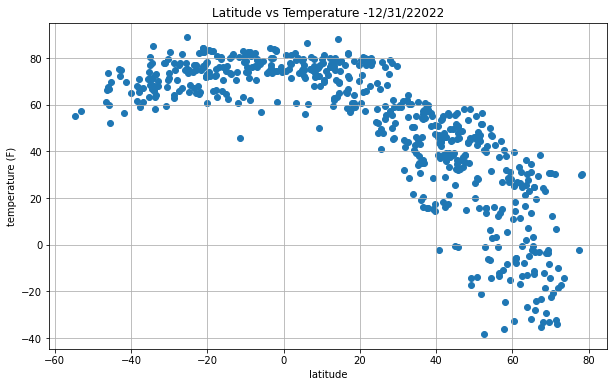

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.temperature)
plt.title("Latitude vs Temperature -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

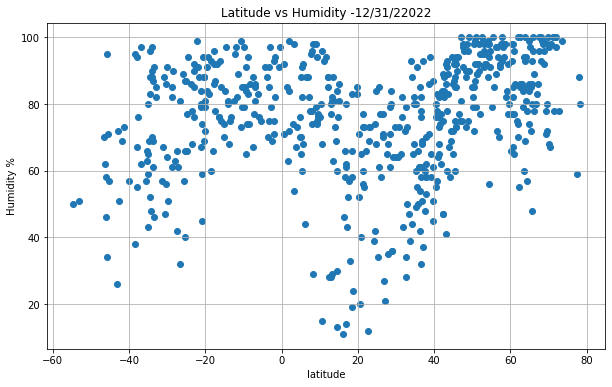

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.humidity)
plt.title("Latitude vs Humidity -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('Humidity %')
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

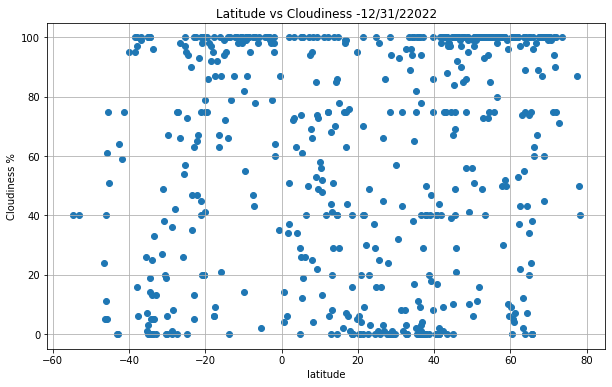

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.cloudiness)
plt.title("Latitude vs Cloudiness -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('Cloudiness %')
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

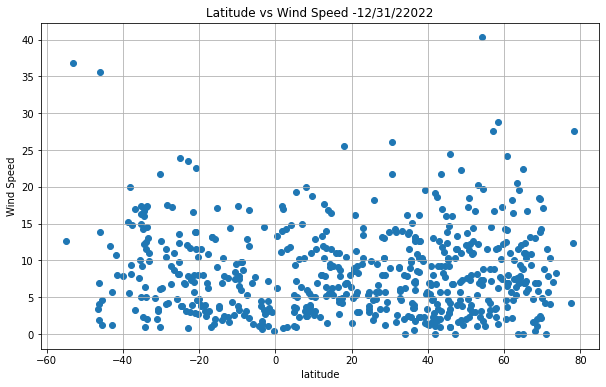

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.wind_speed)
plt.title("Latitude vs Wind Speed -12/31/22022")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6796563855244283


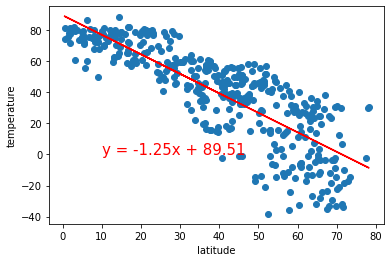

In [13]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)


x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.17603715703253975


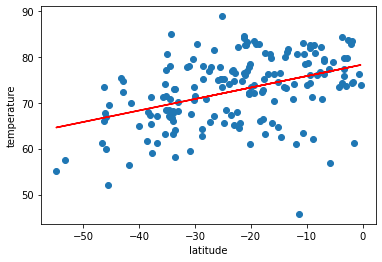

In [14]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15658312446629918


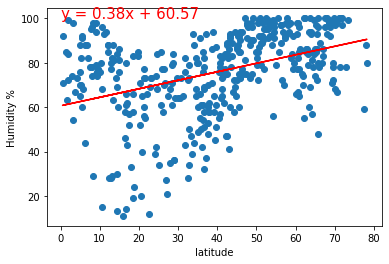

In [15]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-0,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19773406081479808


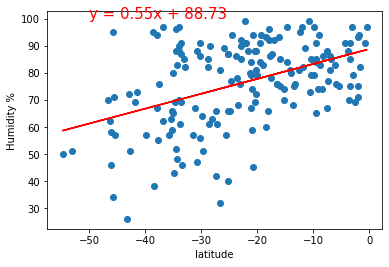

In [16]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09143423670933623


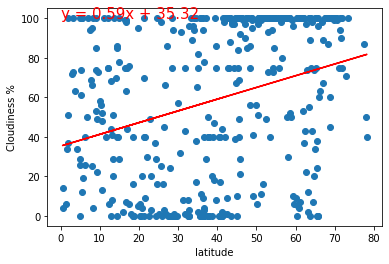

In [17]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09143423670933623


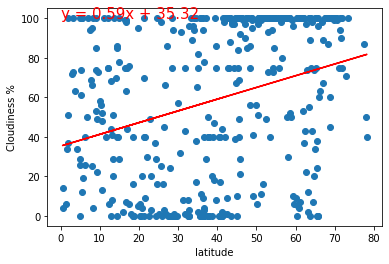

In [18]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10988877664196771


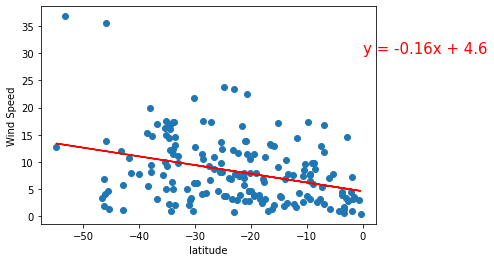

In [19]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
There is a small positive relationship between latitude and Wind Speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003984082046623758


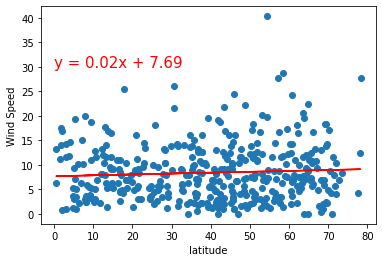

In [20]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
No relationship between latitude and wind speed